<a href="https://colab.research.google.com/github/Varshinigarlapati963/EL_DS_07/blob/main/EL_DS07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sqlite3
import random
import datetime

# Connect or create DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Recreate the table (optional if you want a clean start)
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL,
    sale_date TEXT
)
""")

# Sample product names and prices
products = {
    'Apple': 0.5,
    'Banana': 0.2,
    'Orange': 0.3,
    'Mango': 1.0,
    'Grapes': 0.8
}

# Generate 1000 random records
for _ in range(1000):
    product = random.choice(list(products.keys()))
    price = products[product]
    quantity = random.randint(1, 10)
    sale_date = datetime.date(2023, random.randint(1, 12), random.randint(1, 28)).isoformat()

    cursor.execute("INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)",
                   (product, quantity, price, sale_date))

conn.commit()
conn.close()
print("table created")


table created


In [16]:
import pandas as pd
conn=sqlite3.connect("sales_data.db")
cursor=conn.cursor()
df=pd.read_sql_query("SELECT * FROM sales",conn)
print(df.head(15))

    id product  quantity  price   sale_date
0    1  Grapes         3    0.8  2023-04-25
1    2  Grapes         6    0.8  2023-05-26
2    3   Mango         5    1.0  2023-02-06
3    4  Grapes         5    0.8  2023-11-06
4    5  Grapes        10    0.8  2023-09-22
5    6   Mango        10    1.0  2023-10-26
6    7  Orange         7    0.3  2023-02-11
7    8  Grapes         9    0.8  2023-07-17
8    9   Apple         2    0.5  2023-06-08
9   10  Orange         2    0.3  2023-07-23
10  11  Orange         4    0.3  2023-09-21
11  12  Orange         1    0.3  2023-03-25
12  13  Orange         7    0.3  2023-03-20
13  14  Orange         5    0.3  2023-05-23
14  15  Orange         7    0.3  2023-08-19


In [13]:
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""

df = pd.read_sql_query(query, conn)
print(df)

  product  total_qty  revenue
0   Mango       1176   1176.0
1  Grapes       1106    884.8
2   Apple       1005    502.5
3  Orange       1125    337.5
4  Banana        951    190.2


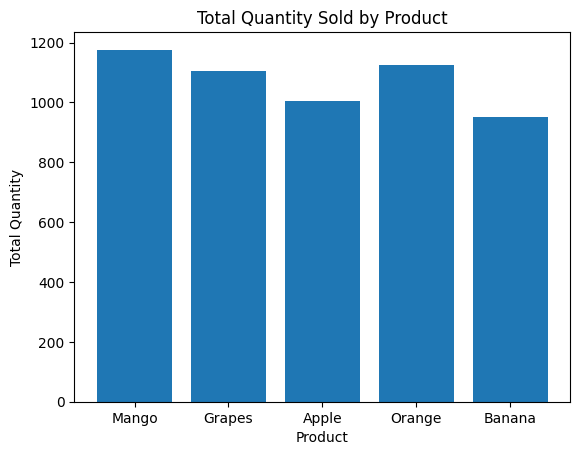

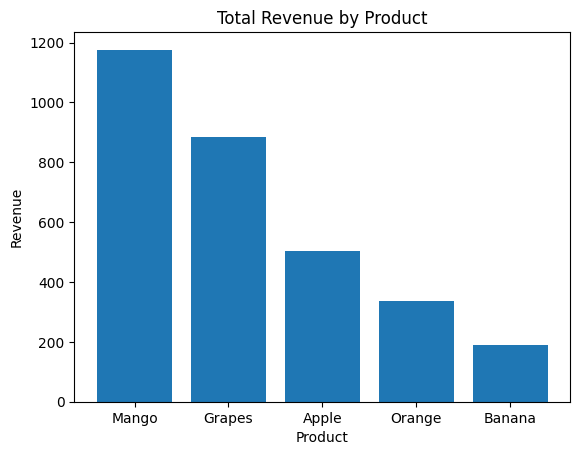

In [15]:
import matplotlib.pyplot as plt
plt.bar(df['product'], df['total_qty'])
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.title('Total Quantity Sold by Product')
plt.show()
plt.bar(df['product'], df['revenue'])
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Total Revenue by Product')
plt.show()

In [23]:
query = """
SELECT
    strftime('%m', sale_date) AS month,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
WHERE sale_date IS NOT NULL
GROUP BY month
ORDER BY month
"""
df = pd.read_sql_query(query, conn)
print(df)

   month  total_qty  revenue
0     01        527    285.5
1     02        507    303.5
2     03        347    191.8
3     04        482    264.0
4     05        430    258.6
5     06        409    236.5
6     07        423    243.6
7     08        429    283.7
8     09        619    338.8
9     10        399    236.9
10    11        385    205.3
11    12        406    242.8


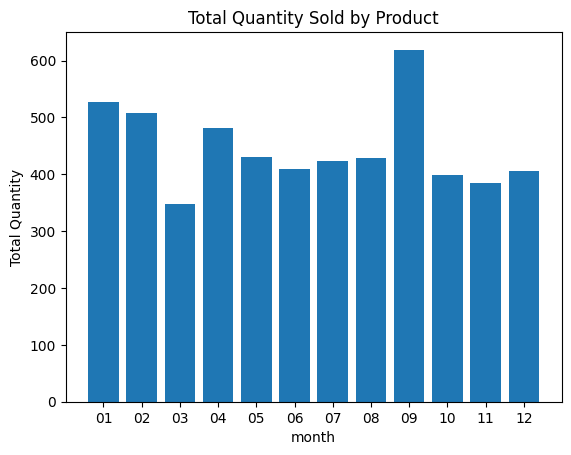

In [24]:
plt.bar(df['month'], df['total_qty'])
plt.xlabel('month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity Sold by Product')
plt.show()

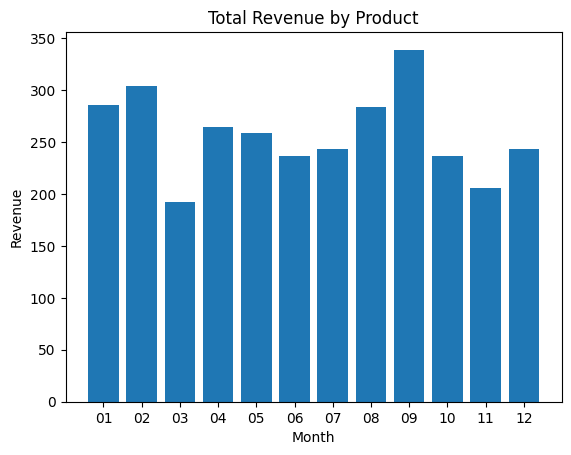

In [25]:
plt.bar(df['month'], df['revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Total Revenue by Product')
plt.show()

In [26]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
import os
os.makedirs('/content/drive/MyDrive/ColabData', exist_ok=True)


In [32]:
import shutil

# Path to your existing DB in Colab VM
src = '/content/sales_data.db'

# Path in your Google Drive where you want to save it
dst = '/content/drive/MyDrive/ColabData/sales_data.db'

# Copy the file
shutil.copy(src, dst)

print("Database saved to Google Drive at:", dst)


Database saved to Google Drive at: /content/drive/MyDrive/ColabData/sales_data.db
